In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset= pd.read_csv('data_stocks.csv')

In [3]:
dataset.shape


(41266, 502)

In [4]:
dataset.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


In [6]:
data_cor = dataset.copy()

Problem 1:
     There are various stocks for which we have collected a data set, which all stocks are apparently similar in performance

In [7]:
# Finding correlation between variables - identify highly correlated variables
cor = data_cor.corr()

In [8]:
cor_dt = pd.DataFrame(data=cor.values, columns=cor.index, index = cor.index)
cor_dt.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
DATE,1.000000,0.885359,0.519808,0.651512,0.953397,0.102760,0.568293,0.793204,-0.757786,0.605316,...,0.669316,-0.829196,0.833376,0.709542,-0.788489,0.895679,0.965059,0.923129,-0.130091,0.719325
SP500,0.885359,1.000000,0.712007,0.553332,0.909061,0.219471,0.562785,0.834350,-0.690018,0.450572,...,0.847975,-0.848511,0.741641,0.820043,-0.517492,0.805525,0.849908,0.915986,0.143752,0.813459
NASDAQ.AAL,0.519808,0.712007,1.000000,0.082065,0.542213,0.209446,0.245801,0.610881,-0.441142,0.009581,...,0.798624,-0.744085,0.284370,0.810955,-0.070950,0.522341,0.395730,0.642336,0.588241,0.753567
NASDAQ.AAPL,0.651512,0.553332,0.082065,1.000000,0.714578,0.264269,0.265641,0.645233,-0.712522,0.326712,...,0.306664,-0.250959,0.738655,0.266994,-0.671488,0.341687,0.693062,0.627531,-0.580055,0.442600
NASDAQ.ADBE,0.953397,0.909061,0.542213,0.714578,1.000000,0.259282,0.476496,0.872353,-0.759604,0.488717,...,0.718851,-0.792876,0.850709,0.722161,-0.758967,0.806615,0.911106,0.939185,-0.067235,0.776052


In [9]:
cor_dt[cor_dt['NASDAQ.AAL'].values > 0.80][:5]

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
NASDAQ.AAL,0.519808,0.712007,1.000000,0.082065,0.542213,0.209446,0.245801,0.610881,-0.441142,0.009581,...,0.798624,-0.744085,0.284370,0.810955,-0.070950,0.522341,0.395730,0.642336,0.588241,0.753567
NASDAQ.AMZN,0.623954,0.834878,0.803319,0.370111,0.730719,0.386619,0.252712,0.828757,-0.648854,0.059345,...,0.879967,-0.733852,0.530139,0.804398,-0.203979,0.533584,0.503878,0.793529,0.419472,0.872246
NASDAQ.EXPE,0.779218,0.892177,0.812206,0.379622,0.818384,0.218189,0.369697,0.834440,-0.707045,0.296553,...,0.931258,-0.825230,0.591514,0.859042,-0.368192,0.712184,0.658203,0.883902,0.347660,0.913009
NASDAQ.HAS,0.196355,0.473669,0.832713,-0.274890,0.251696,0.252954,-0.030201,0.394658,-0.206013,-0.208923,...,0.698866,-0.609800,0.035341,0.625126,0.264187,0.306630,0.055201,0.406760,0.839854,0.651842
NYSE.CMI,0.493660,0.720325,0.810391,0.088336,0.528227,0.206259,0.179664,0.577301,-0.458993,0.140823,...,0.803020,-0.677137,0.226787,0.767652,-0.003402,0.521924,0.370814,0.616157,0.581472,0.753369


Excersise 2:

How many Unique patterns that exist in the historical stock data set, based on fluctuations in price.

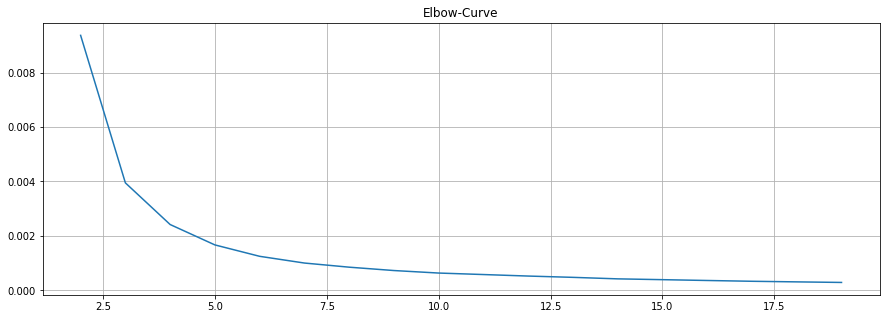

In [12]:
from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
import pandas as pd
from math import sqrt
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

returns = dataset.pct_change().mean()*252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns.Volatility = dataset.pct_change().std()*sqrt(252)

# format the data into numpy array to feed into K-means algorithm
dta = np.asarray([np.asarray(returns.Returns), np.asarray(returns.Volatility)]).T

X = dta
distortions =[]
for k in range(2,20):
    k_means = KMeans(n_clusters = k)
    k_means.fit(X)
    distortions.append(k_means.inertia_)

fig = plt.figure(figsize=(15,5))
plt.plot(range(2,20),distortions)
plt.grid(True)
plt.title('Elbow-Curve')
plt.show()

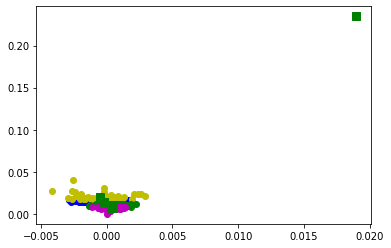

In [13]:
from pylab import plot, show
# Computing kmeans with K =5 (5 clusters)
centroids,_= kmeans(dta, 5)
# Assign each sample to a cluster
idx,_ = vq(dta, centroids)

# some plotting using numpy's logical indexing
plot(dta[idx==0,0],dta[idx==0,1],'ob',
     dta[idx==1,0],dta[idx==1,1],'oy',
     dta[idx==2,0],dta[idx==2,1],'or',
     dta[idx==3,0],dta[idx==3,1],'og',
     dta[idx==4,0],dta[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

In [14]:
#identify the outlier
print(returns.idxmax())

Returns    NYSE.XRX
dtype: object


In [15]:
dataset.drop(['NYSE.XRX'],inplace=True,axis=1)

returns = dataset.pct_change().mean()*252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns.Volatility = dataset.pct_change().std()*sqrt(252)

# format the data into numpy array to feed into K-means algorithm
 
#recreate data to feed into the algorithm
dta = np.asarray([np.asarray(returns.Returns), np.asarray(returns.Volatility)]).T

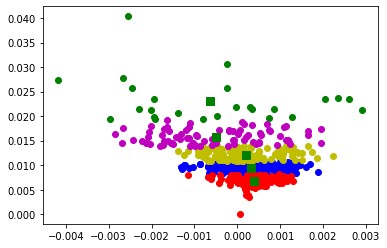

In [16]:
centroids,_= kmeans(dta, 5)
# Assign each sample to a cluster
idx,_ = vq(dta, centroids)

# some plotting using numpy's logical indexing
plot(dta[idx==0,0],dta[idx==0,1],'ob',
     dta[idx==1,0],dta[idx==1,1],'oy',
     dta[idx==2,0],dta[idx==2,1],'or',
     dta[idx==3,0],dta[idx==3,1],'og',
     dta[idx==4,0],dta[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

In [17]:
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]
details[:5]
#for detail in details:
#   print(list(detail))

[('DATE', 2),
 ('SP500', 2),
 ('NASDAQ.AAL', 4),
 ('NASDAQ.AAPL', 0),
 ('NASDAQ.ADBE', 0)]

In [18]:
df = pd.DataFrame(details, columns=['Stock_Name','Cluster_No'])
df.Cluster_No.value_counts()

0    171
1    119
2    106
4     80
3     25
Name: Cluster_No, dtype: int64

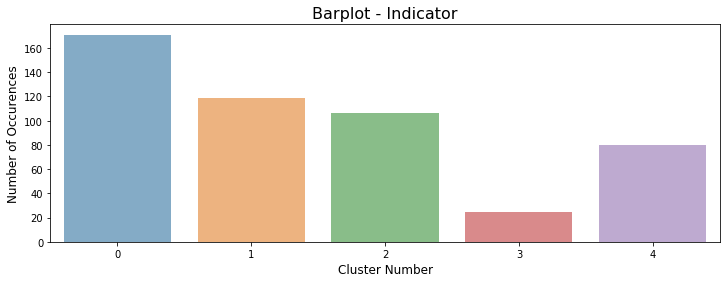

In [19]:

import seaborn as sns
ind = df.Cluster_No.value_counts()
plt.figure(figsize=(12,4))
sns.barplot(x=ind.index, y=ind.values, alpha=0.6)
plt.ylabel('Number of Occurences',fontsize=12)
plt.xlabel('Cluster Number',fontsize=12)
plt.title('Barplot - Indicator',fontsize =16)
plt.show()

Identify which all stocks are moving together and which all stocks are different from each other.

In [21]:
dataset.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WY,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,34.00,84.370,119.035,44.40,39.88,82.03,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,34.07,84.370,119.035,44.11,39.88,82.03,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,34.11,84.585,119.260,44.09,39.98,82.02,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,33.97,84.460,119.260,44.25,39.99,82.02,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,34.00,84.470,119.610,44.11,39.96,82.03,50.20,63.91,121.695,53.240


In [22]:
dt = dataset.copy()
#dt.drop(['DATE','SP500'],inplace=True,axis=1)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# convert data into numpy arrays
X = dt.values

# Scaling the values
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

pca = PCA(n_components=150)
pca.fit(X_scaled)

# the amount of variance that each PCA explains
var = pca.explained_variance_ratio_

# cumulative varince explains
var1 = np.cumsum(np.round(var, decimals=4)*100)
print(var1)

[47.15 64.35 76.33 81.17 84.97 87.77 89.77 91.07 92.12 92.87 93.55 94.13
 94.59 95.04 95.44 95.78 96.11 96.37 96.6  96.82 97.01 97.17 97.32 97.45
 97.58 97.7  97.81 97.91 98.   98.08 98.16 98.24 98.31 98.38 98.44 98.5
 98.56 98.61 98.66 98.71 98.75 98.79 98.83 98.87 98.91 98.94 98.97 99.
 99.03 99.06 99.09 99.12 99.15 99.17 99.19 99.21 99.23 99.25 99.27 99.29
 99.31 99.33 99.35 99.37 99.39 99.41 99.43 99.45 99.46 99.47 99.48 99.49
 99.5  99.51 99.52 99.53 99.54 99.55 99.56 99.57 99.58 99.59 99.6  99.61
 99.62 99.63 99.64 99.65 99.66 99.67 99.68 99.69 99.7  99.71 99.72 99.73
 99.74 99.75 99.76 99.77 99.78 99.78 99.78 99.78 99.78 99.78 99.78 99.78
 99.78 99.78 99.78 99.78 99.78 99.78 99.78 99.78 99.78 99.78 99.78 99.78
 99.78 99.78 99.78 99.78 99.78 99.78 99.78 99.78 99.78 99.78 99.78 99.78
 99.78 99.78 99.78 99.78 99.78 99.78 99.78 99.78 99.78 99.78 99.78 99.78
 99.78 99.78 99.78 99.78 99.78 99.78]


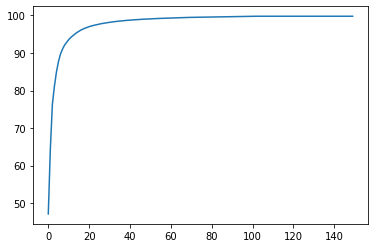

In [23]:
plt.plot(var1)


In [24]:
# Looking at above plot I can consider 25 variables 
pca = PCA(n_components =25)
X1 = pca.fit_transform(X_scaled)
print(X1)

[[ 25.6417626    9.96983408  -9.37958872 ...   0.55580576   0.11017919
    2.42777811]
 [ 25.73952767   9.85594789  -9.8002166  ...   0.45780899   0.19842433
    2.32005036]
 [ 25.65644624   9.78937255  -9.67286418 ...   0.5342248    0.06405833
    2.06367876]
 ...
 [-22.83258653  13.35424365   6.52472419 ...  -2.13769824   1.22408824
   -0.3259355 ]
 [-22.67946084  13.44439359   6.63783486 ...  -2.12344447   1.22970126
   -0.35102919]
 [-22.78737302  13.38901151   6.56606926 ...  -2.16083377   1.2106078
   -0.31092207]]


In [25]:
print('Number of PCA :',len(pca.components_))
print(abs(pca.components_))

Number of PCA : 25
[[6.42157060e-02 6.11151571e-02 3.91965778e-02 ... 6.23551262e-02
  2.53478281e-03 5.16228664e-02]
 [1.35187922e-02 1.77857678e-02 6.42779929e-02 ... 2.02915736e-02
  8.13199339e-02 5.93844043e-02]
 [5.35728597e-05 1.39046386e-02 3.98701948e-02 ... 2.09506794e-02
  6.61982030e-02 2.36050391e-02]
 ...
 [1.73734935e-03 4.19158102e-04 1.10934468e-02 ... 1.17998645e-02
  4.41098495e-02 1.14351435e-02]
 [2.20023762e-03 1.57081220e-03 7.44136600e-02 ... 1.49900703e-03
  1.84940721e-02 4.84807989e-02]
 [1.36381329e-02 1.72503841e-02 2.28513445e-02 ... 4.72269189e-03
  2.05755181e-02 2.45083041e-02]]


In [26]:
comp = pd.DataFrame(pca.components_, columns = dt.columns)
comp.head()


,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WY,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,-0.064216,-0.061115,-0.039197,-0.041028,-0.062781,-0.009822,-0.035769,-0.054599,0.050277,-0.035250,...,0.044117,-0.049342,0.056847,-0.054520,-0.050499,0.047068,-0.061240,-0.062355,0.002535,-0.051623
1,0.013519,-0.017786,-0.064278,0.033999,0.001959,-0.032384,0.043469,-0.029386,0.016023,0.058243,...,-0.022173,-0.058880,0.030232,0.013787,-0.040747,-0.052904,0.031530,-0.020292,-0.081320,-0.059384
2,0.000054,-0.013905,-0.039870,0.063935,0.011939,0.043312,-0.037477,0.040438,-0.053859,-0.051297,...,-0.046101,-0.003236,0.022100,0.059540,-0.034645,-0.028557,-0.004539,0.020951,-0.066198,0.023605
3,-0.000164,0.011459,0.007225,0.077200,0.008359,-0.027981,-0.017832,0.008797,-0.032314,0.034403,...,-0.053988,0.021527,0.061149,-0.039733,0.027452,0.012199,0.002668,-0.002848,-0.049659,0.015101
4,0.015357,-0.054537,-0.032737,-0.017218,0.002666,-0.038158,-0.101611,-0.034521,-0.011250,0.037430,...,-0.081640,-0.036463,-0.011955,-0.030141,-0.011671,-0.045876,-0.002790,-0.001087,-0.003197,0.005562
